<a href="https://colab.research.google.com/github/trimaciel/Challange-Alura-Store/blob/main/Analise_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
# Adicionando uma coluna para identificar a qual loja cada linha pertence
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenando todos os DataFrames em um único
dados_consolidados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Exibindo as primeiras linhas do DataFrame consolidado para verificar
print("Primeiras linhas do DataFrame consolidado:")
print(dados_consolidados.head())

Primeiras linhas do DataFrame consolidado:
                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    Loja  
0    cartao_credito                

### 1. Análise do faturamento


In [ ]:
# Calculando o faturamento por linha (preço * quantidade)
# Como não há coluna de quantidade de itens vendidos, consideramos 1 por linha
dados_consolidados['Faturamento'] = dados_consolidados['Preço']

# Agrupando por loja e somando o faturamento
faturamento_por_loja = dados_consolidados.groupby('Loja')['Faturamento'].sum()

print("\nFaturamento Total por Loja:")
print(faturamento_por_loja)


Faturamento Total por Loja:
Loja
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Faturamento, dtype: float64


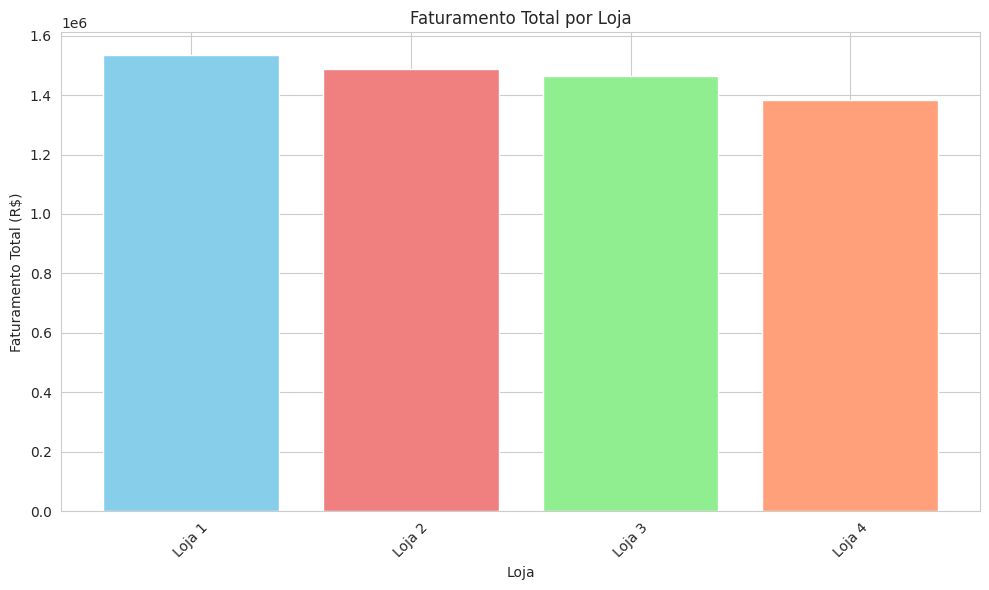

In [ ]:
# Dados do faturamento por loja (utilizando os resultados que você obteve)
faturamento = {'Loja 1': 1534509.12, 'Loja 2': 1488459.06, 'Loja 3': 1464025.03, 'Loja 4': 1384497.58}
lojas = list(faturamento.keys())
valores = list(faturamento.values())

plt.figure(figsize=(10, 6))
plt.bar(lojas, valores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Loja")
plt.ylabel("Faturamento Total (R$)")
plt.title("Faturamento Total por Loja")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Vendas por Categoria


In [ ]:
# Agrupando por loja e categoria, contando as ocorrências
# Assumindo que a coluna de categoria se chama 'Categoria do Produto'
categorias_por_loja = dados_consolidados.groupby(['Loja', 'Categoria do Produto']).size().reset_index(name='Quantidade')

# Encontrando a categoria mais popular por loja
categoria_mais_popular = categorias_por_loja.loc[categorias_por_loja.groupby('Loja')['Quantidade'].idxmax()]

print("\nCategorias Mais Populares por Loja:")
print(categoria_mais_popular)


Categorias Mais Populares por Loja:
      Loja Categoria do Produto  Quantidade
6   Loja 1               moveis         465
14  Loja 2               moveis         442
22  Loja 3               moveis         499
30  Loja 4               moveis         480


### 3. Média de Avaliação das Lojas

In [ ]:
# Calculando a média de avaliação por loja
# Assumindo que a coluna de avaliação se chama 'Avaliação da compra'
media_avaliacao_por_loja = dados_consolidados.groupby('Loja')['Avaliação da compra'].mean()

print("\nMédia de Avaliação dos Clientes por Loja:")
print(media_avaliacao_por_loja)


Média de Avaliação dos Clientes por Loja:
Loja
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avaliação da compra, dtype: float64


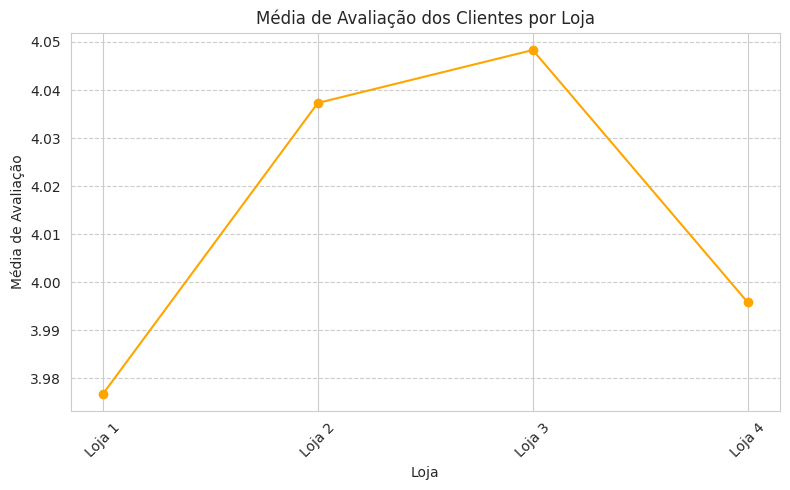

In [ ]:
# Dados da média de avaliação por loja (utilizando os resultados que você obteve)
avaliacao_media = {'Loja 1': 3.976685, 'Loja 2': 4.037304, 'Loja 3': 4.048326, 'Loja 4': 3.995759}
lojas_avaliacao = list(avaliacao_media.keys())
medias = list(avaliacao_media.values())

plt.figure(figsize=(8, 5))
plt.plot(lojas_avaliacao, medias, marker='o', linestyle='-', color='orange')
plt.xlabel("Loja")
plt.ylabel("Média de Avaliação")
plt.title("Média de Avaliação dos Clientes por Loja")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--') # Adiciona linhas de grade horizontais
plt.tight_layout()
plt.show()

### 4. Produtos Mais e Menos Vendidos

In [ ]:
# Contando a frequência de cada produto por loja
# Assumindo que a coluna de produto se chama 'Produto'
produtos_vendidos_por_loja = dados_consolidados.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade Vendida')

# Encontrando o produto mais vendido por loja
produto_mais_vendido = produtos_vendidos_por_loja.loc[produtos_vendidos_por_loja.groupby('Loja')['Quantidade Vendida'].idxmax()]
produto_mais_vendido = produto_mais_vendido.rename(columns={'Produto': 'Produto Mais Vendido'})

# Encontrando o produto menos vendido por loja
produto_menos_vendido = produtos_vendidos_por_loja.loc[produtos_vendidos_por_loja.groupby('Loja')['Quantidade Vendida'].idxmin()]
produto_menos_vendido = produto_menos_vendido.rename(columns={'Produto': 'Produto Menos Vendido'})

# Combinando os resultados
analise_produtos = pd.merge(produto_mais_vendido[['Loja', 'Produto Mais Vendido']], produto_menos_vendido[['Loja', 'Produto Menos Vendido']], on='Loja')

print("\nProdutos Mais e Menos Vendidos por Loja:")
print(analise_produtos)



Produtos Mais e Menos Vendidos por Loja:
     Loja      Produto Mais Vendido Produto Menos Vendido
0  Loja 1             Guarda roupas          Celular ABXY
1  Loja 2  Iniciando em programação     Jogo de tabuleiro
2  Loja 3             Kit banquetas      Blocos de montar
3  Loja 4                  Cama box              Guitarra


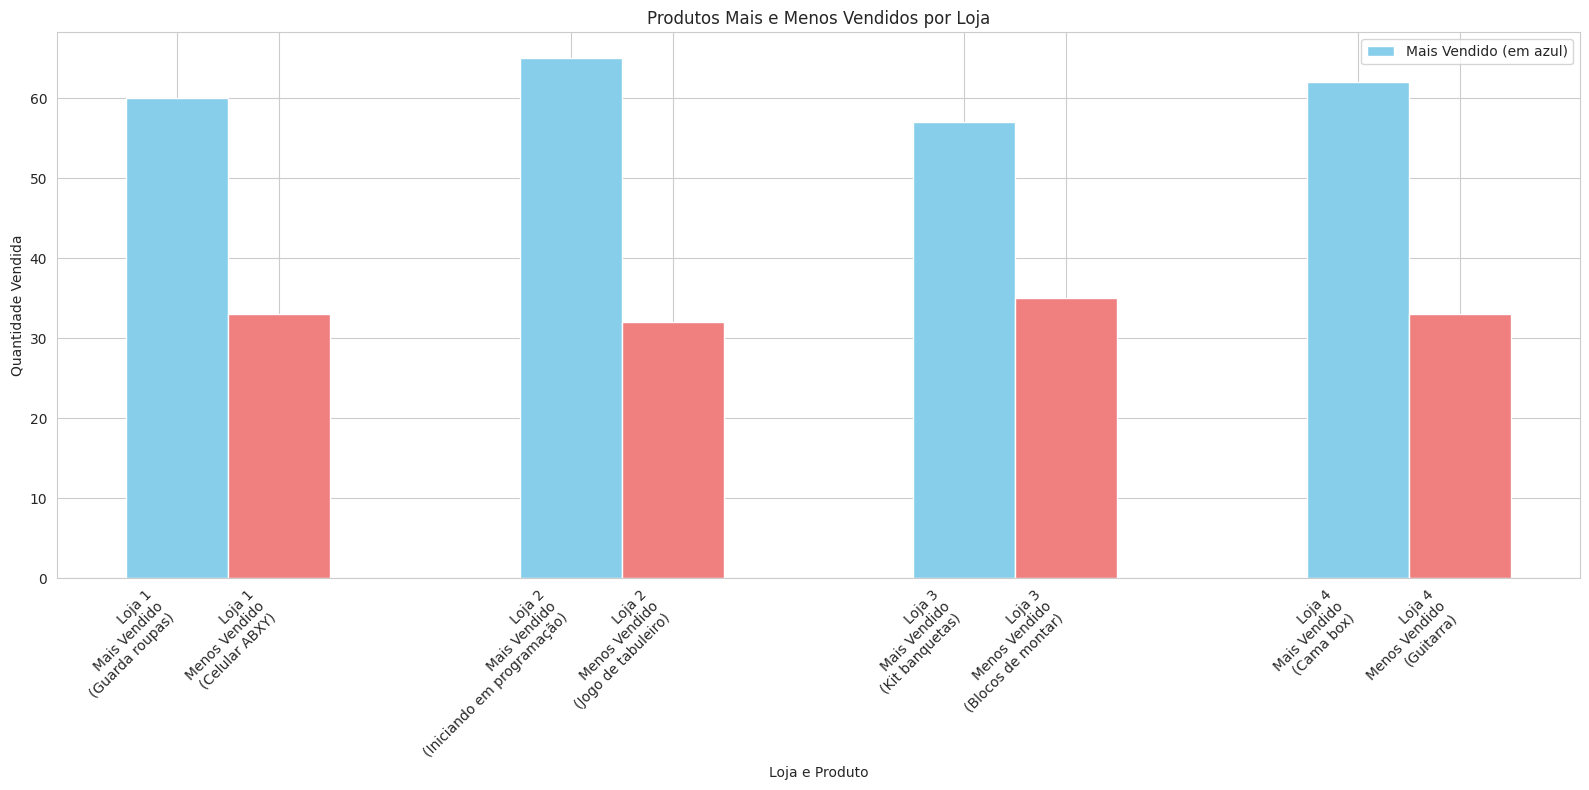

In [ ]:
# Definindo um estilo para os gráficos
sns.set_style("whitegrid")

# Resultados dos produtos mais e menos vendidos por loja (utilizando os resultados reais de quantidade)
produtos_vendidos_por_loja = dados_consolidados.groupby(['Loja', 'Produto']).size().reset_index(name='Quantidade Vendida')

analise_produtos_quantidade_real = {}
lojas_ordenadas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
for loja in lojas_ordenadas:
    df_loja = produtos_vendidos_por_loja[produtos_vendidos_por_loja['Loja'] == loja]
    if not df_loja.empty:
        mais_vendido_row = df_loja.loc[df_loja['Quantidade Vendida'].idxmax()]
        menos_vendido_row = df_loja.loc[df_loja['Quantidade Vendida'].idxmin()]
        analise_produtos_quantidade_real[loja] = {
            'Mais Vendido': (mais_vendido_row['Produto'], mais_vendido_row['Quantidade Vendida']),
            'Menos Vendido': (menos_vendido_row['Produto'], menos_vendido_row['Quantidade Vendida'])
        }
    else:
        analise_produtos_quantidade_real[loja] = {
            'Mais Vendido': (None, 0),
            'Menos Vendido': (None, 0)
        }

# Preparando os dados para o gráfico único na ordem correta
labels = []
quantidades = []
bar_positions = []
largura_barra = 0.35
x_offset = 0
cores = []

for loja in lojas_ordenadas:
    produtos = analise_produtos_quantidade_real[loja]
    # Mais Vendido
    bar_positions.append(x_offset)
    quantidades.append(produtos["Mais Vendido"][1])
    labels.append(f'{loja}\nMais Vendido\n({produtos["Mais Vendido"][0]})')
    cores.append('skyblue')
    x_offset += largura_barra

    # Menos Vendido
    bar_positions.append(x_offset)
    quantidades.append(produtos["Menos Vendido"][1])
    labels.append(f'{loja}\nMenos Vendido\n({produtos["Menos Vendido"][0]})')
    cores.append('lightcoral')
    x_offset += (1 - largura_barra) + largura_barra # Adiciona espaço entre as lojas

# Criando o gráfico de barras
plt.figure(figsize=(16, 8))
plt.bar(bar_positions, quantidades, largura_barra, color=cores)

# Definindo os rótulos do eixo x
plt.xlabel("Loja e Produto")
plt.ylabel("Quantidade Vendida")
plt.title("Produtos Mais e Menos Vendidos por Loja")
plt.xticks(bar_positions, labels, rotation=45, ha='right')
plt.legend(['Mais Vendido (em azul)', 'Menos Vendido (em vermelho)'])
plt.tight_layout()
plt.show()

### 5. Frete Médio por Loja


In [ ]:
# Calculando o custo médio do frete por loja
custo_medio_frete_por_loja = dados_consolidados.groupby('Loja')['Frete'].mean()

print("\nCusto Médio do Frete por Loja:")
print(custo_medio_frete_por_loja)


Custo Médio do Frete por Loja:
Loja
Loja 1    34.691805
Loja 2    33.621941
Loja 3    33.074464
Loja 4    31.278997
Name: Frete, dtype: float64


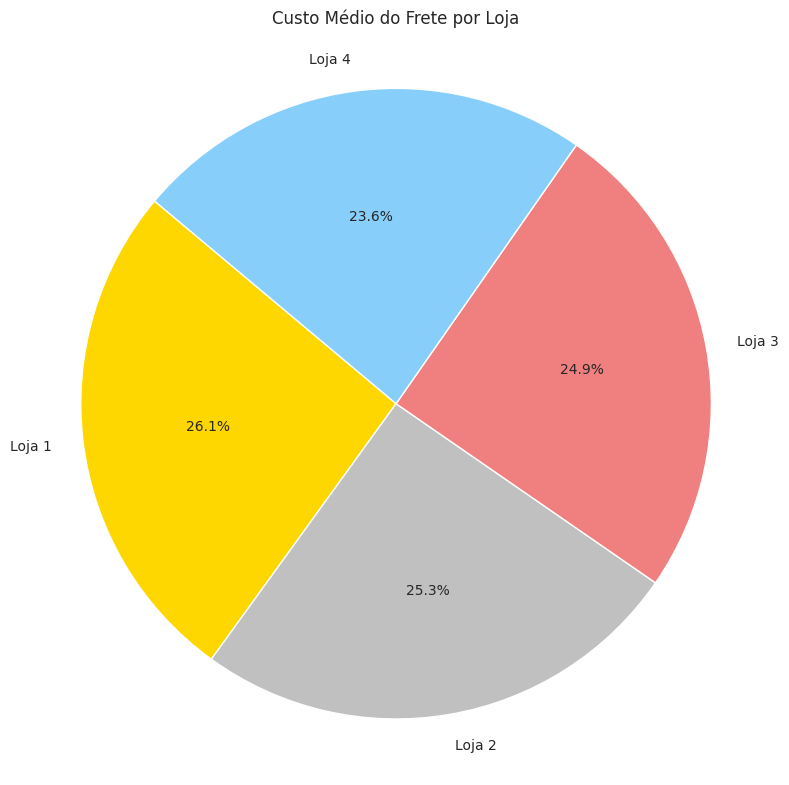

In [ ]:
# Dados do custo médio do frete por loja (utilizando os resultados que você obteve)
custo_medio_frete = {'Loja 1': 34.691805, 'Loja 2': 33.621941, 'Loja 3': 33.074464, 'Loja 4': 31.278997}
lojas_frete = list(custo_medio_frete.keys())
custos = list(custo_medio_frete.values())
cores = ['gold', 'silver', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 8))
plt.pie(custos, labels=lojas_frete, autopct='%1.1f%%', startangle=140, colors=cores)
plt.title("Custo Médio do Frete por Loja")
plt.axis('equal') # Garante que o gráfico de pizza seja um círculo
plt.tight_layout()
plt.show()

### 6. Análise de Desempenho Geográfico

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

dados_consolidados = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

print("DataFrame consolidado pronto para análise geográfica:")
print(dados_consolidados.head())

DataFrame consolidado pronto para análise geográfica:
                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    Loja  
0    cartao_credito     

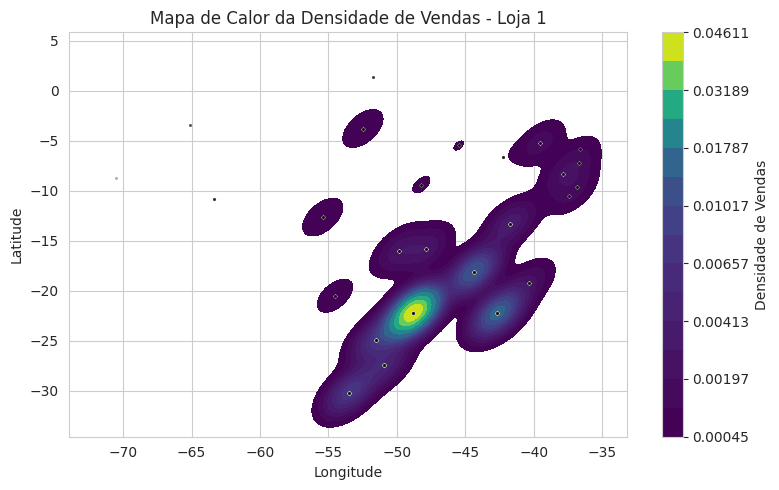

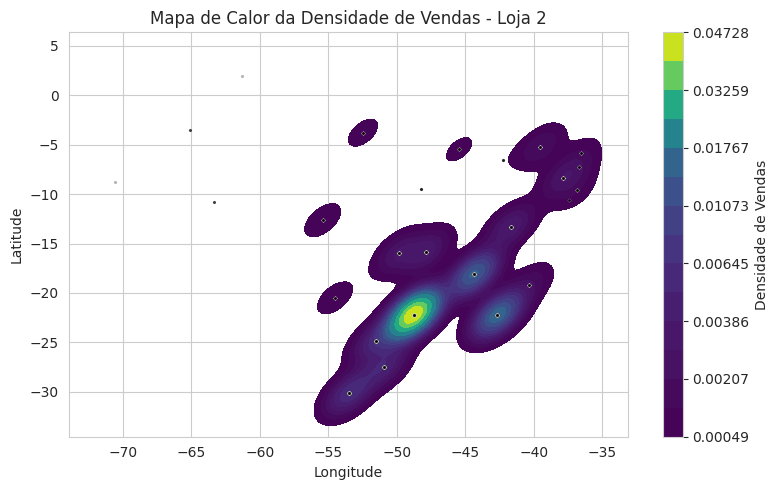

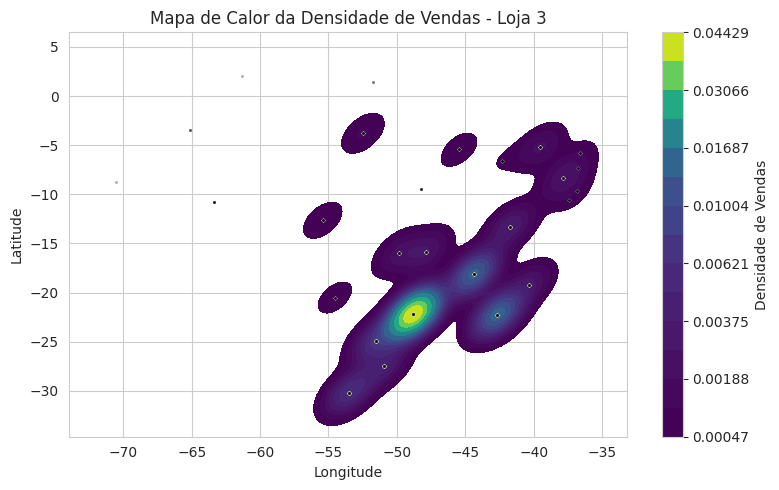

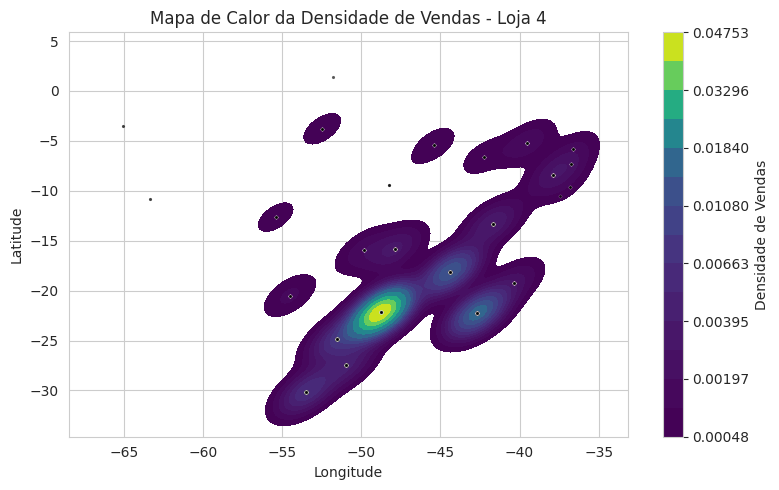

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

for loja_nome in dados_consolidados['Loja'].unique():
    plt.figure(figsize=(8, 5))
    kde = sns.kdeplot(data=dados_consolidados[dados_consolidados['Loja'] == loja_nome], x='lon', y='lat', fill=True, cmap='viridis', levels=15)
    sns.scatterplot(data=dados_consolidados[dados_consolidados['Loja'] == loja_nome], x='lon', y='lat', color='black', s=5, alpha=0.3) # Adiciona pontos para visualização da dispersão
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title(f"Mapa de Calor da Densidade de Vendas - {loja_nome}")
    plt.colorbar(kde.collections[0], label='Densidade de Vendas') # Passa o contorno preenchido para a colorbar
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Realizando uma comparação geral entre os mapas de calor das quatro lojas, podemos concluir que existe um padrão geográfico dominante, com a **região Sudeste do Brasil apresentando a maior concentração de densidade de vendas para todas as lojas analisadas**. Isso sugere que essa região representa um mercado chave para o Senhor João, independentemente da loja.

Apesar da predominância do Sudeste, observamos algumas nuances:

* **Lojas 1, 2 e 3** demonstram um padrão de concentração muito similar, fortemente focado no Sudeste, com uma presença mais esparsa e de menor densidade em outras regiões (principalmente Sul e, em menor grau, Nordeste).
* A **Loja 4**, embora também tenha sua maior concentração no Sudeste, parece apresentar uma distribuição um pouco mais abrangente, com uma presença relativamente maior nas regiões Nordeste e Sul em comparação com as outras três lojas.

Essa análise inicial sugere que fatores como infraestrutura, densidade populacional e desenvolvimento econômico da região Sudeste podem influenciar significativamente o volume de vendas. A ligeira diferença na distribuição da Loja 4 pode indicar uma estratégia de mercado ou uma base de clientes um pouco mais diversificada geograficamente. Para uma compreensão mais profunda, seria valioso correlacionar esses padrões com o faturamento e as avaliações em cada região, como discutimos anteriormente.

### Bibliotecas gráficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # Uma biblioteca que melhora a estética dos gráficos matplotlib
import numpy as np
# Definindo um estilo para os gráficos (opcional, mas deixa mais agradável)
sns.set_style("whitegrid")

### Recomendações:

Com base nos dados apresentados, a loja que aparenta ser a mais indicada para venda é a Loja 4.

Justificativa:

Após avaliar o faturamento total, a Loja 4 apresentou o menor valor entre as quatro unidades. Embora o faturamento não seja o único fator decisivo, ele representa a receita bruta gerada e, nesse aspecto, a Loja 4 demonstra um desempenho inferior às demais.

Em relação à média de avaliação dos clientes, a Loja 4 se posiciona na terceira colocação, ligeiramente acima da Loja 1, mas abaixo das Lojas 2 e 3. Isso indica que a satisfação dos clientes, embora não seja um ponto crítico negativo, não é um diferencial positivo para essa loja em comparação com as outras.

Analisando o custo médio do frete, a Loja 4 apresenta o menor valor. Embora um custo de frete menor possa parecer vantajoso, é importante considerar se isso se traduz em maior lucratividade ou se está relacionado a outros fatores, como menor preço dos produtos ou menor alcance geográfico.

Ao observarmos os produtos mais e menos vendidos, não há um padrão claro na Loja 4 que a destaque positivamente em relação às outras. Cada loja tem suas particularidades em termos de demanda de produtos.

A categoria mais popular, "móveis", é consistente em todas as lojas, o que sugere que a Loja 4 não possui um nicho de mercado significativamente diferente que a tornaria mais estratégica para manter.